In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

#Nate shared this list as his ultimate go-to during our regresssion hack-a-thon

In [2]:
df_ames_train = pd.read_csv('./datasets/train.csv')

I know I need to split my data into train/test before I do any data transformations and build any models.

In [3]:
df_ames_lasso_cat_train = df_ames_train[['Overall Qual','Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Neighborhood',
'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'SalePrice']]

In [4]:
df_ames_lasso_cat_train.isna().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       1
Total Bsmt SF     1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      1
Neighborhood      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
SalePrice         0
dtype: int64

In [5]:
#I am totally okay with dropping the rows with missing data
df_ames_lasso_cat_train.dropna(inplace=True)

C:\Users\sarah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
df_ames_lasso_cat_train.isna().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      0
Neighborhood      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
SalePrice         0
dtype: int64

In [7]:

X = df_ames_lasso_cat_train[['Overall Qual','Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1','Neighborhood',
'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
y = df_ames_lasso_cat_train['SalePrice']
    

In [8]:
X.shape

(2049, 15)

In [9]:
y.shape

(2049,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
X_train.dtypes

Overall Qual        int64
Gr Liv Area         int64
Garage Cars       float64
Total Bsmt SF     float64
1st Flr SF          int64
Year Built          int64
Year Remod/Add      int64
Full Bath           int64
TotRms AbvGrd       int64
Fireplaces          int64
BsmtFin SF 1      float64
Neighborhood       object
Open Porch SF       int64
Wood Deck SF        int64
Lot Area            int64
dtype: object

In [12]:
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Neighborhood', 'Overall Qual']),
    remainder='passthrough',
     verbose_feature_names_out=False)


In [13]:
pipe3 = make_pipeline(ct1, StandardScaler(), Lasso())

In [14]:
params3 = {
           'lasso__alpha': [.005,.01, 0.1, 1, 100, 200]}
           #controls regularization

In [15]:
gs3 = GridSearchCV(pipe3, params3, n_jobs=-1)

In [16]:
pipe3.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'standardscaler', 'lasso', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__onehotencoder', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

In [17]:
ct1.get_feature_names_out



<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Neighborhood', 'Overall Qual'])],
                  verbose_feature_names_out=False)>

In [18]:
gs3.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Neighborhood',
                                                                          'Overall '
                                                                          'Qual'])],
                                                          verbose_feature_names_out=False)),
                                       ('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.005, 0.01, 0.1, 1, 100, 200]})

In [19]:
pd.DataFrame(gs3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.080225,0.005829,0.006002,0.002452,0.005,{'lasso__alpha': 0.005},0.839394,0.814299,0.881644,0.864447,0.718855,0.823728,0.057175,6
1,0.084918,0.011520,0.004202,0.000748,0.01,{'lasso__alpha': 0.01},0.839394,0.814299,0.881644,0.864447,0.718856,0.823728,0.057175,5
2,0.084218,0.012547,0.006002,0.004148,0.1,{'lasso__alpha': 0.1},0.839394,0.814298,0.881644,0.864448,0.718881,0.823733,0.057166,4
3,0.094822,0.016872,0.003805,0.000746,1,{'lasso__alpha': 1},0.839396,0.814297,0.881647,0.864452,0.719028,0.823764,0.057113,3
4,0.020204,0.001720,0.005602,0.002728,100,{'lasso__alpha': 100},0.839609,0.814159,0.882062,0.864793,0.722327,0.824590,0.056056,2
5,0.013603,0.001021,0.003200,0.000401,200,{'lasso__alpha': 200},0.840123,0.813872,0.882305,0.864979,0.725508,0.825357,0.055014,1


In [20]:
gs3.best_params_

{'lasso__alpha': 200}

In [21]:
gs3.best_estimator_.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['Neighborhood', 'Overall Qual'])],
                   verbose_feature_names_out=False),
 'standardscaler': StandardScaler(),
 'lasso': Lasso(alpha=200)}

In [22]:
gs3.best_estimator_.named_steps['standardscaler'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37',
       'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49'], dtype=object)

In [23]:
gs3.best_score_

0.8253574812257003

In [24]:
cols_g3 = gs3.best_estimator_.named_steps.get('columntransformer').get_feature_names_out()
cols_g3

array(['Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Overall Qual_1', 'Overall Qual_2',
       'Overall Qual_3', 'Overall Qual_4', 'Overall Qual_5',
       'Overall Qual_6', 'Overall Qual_7', 'Overall Qual_8',
       'Overall Qual_9', 'Overall Qual_10', 'Gr Liv Area', 'Garage Cars',
       'Total Bsmt SF', '1st Flr

In [25]:
gs3.best_estimator_.named_steps['lasso'].coef_

array([   -0.        ,  -959.7812674 , -1696.22019718,   163.53556568,
        1266.17345691,   908.22151965,  4581.80043664, -3179.9593638 ,
       -1339.12420712,  -797.78114027,  3552.72218169, -1378.41674245,
       -2294.80262823,  -993.14752407,   160.47627478, -1188.07640289,
          -0.        ,  4198.25578427,  7987.55038425, -1801.50363303,
          -0.        ,  -668.98248895,  -113.57044381,   627.89677827,
        5623.60674155,  1134.16411474,  2008.44920025, -1328.32399514,
       -2136.20649394, -2333.28984327, -3576.6859816 , -2561.66462298,
          -0.        ,  5383.23669576, 14214.26529547, 18723.87564296,
       11105.05481032, 18434.83734771,  6676.21978626,  2121.03907962,
        -237.47740894,  8294.90444027,  7441.62582222,   870.67915357,
         564.51721689,  6068.90583453,  6640.54356012,   398.93763847,
        1397.99581618,  4504.98124083])

In [26]:
pd.DataFrame(zip(cols_g3, 
gs3.best_estimator_.named_steps['lasso'].coef_))

,0,1
0,Neighborhood_Blmngtn,-0.000000
1,Neighborhood_Blueste,-959.781267
2,Neighborhood_BrDale,-1696.220197
3,Neighborhood_BrkSide,163.535566
4,Neighborhood_ClearCr,1266.173457
5,Neighborhood_CollgCr,908.221520
6,Neighborhood_Crawfor,4581.800437
7,Neighborhood_Edwards,-3179.959364
8,Neighborhood_Gilbert,-1339.124207
9,Neighborhood_Greens,-797.781140


In [27]:
gs3.best_estimator_.named_steps['lasso'].intercept_

179758.70117187503

In [28]:
gs3.score(X_test, y_test)

0.8873589550761557

In [29]:
#Make predictions on the test set
preds = gs3.predict(X_test)

In [30]:
#Evaluate my metrics
print('Lasso Model #2 w/Categorical Vars: MAE:', mean_absolute_error(y_test, preds))
print('Lasso Model #2 w/Categorical Vars: MSE:', mean_squared_error(y_test, preds))
print('Lasso Model #2 w/Categorical Vars: R2:', r2_score(y_test, preds))

Lasso Model #2 w/Categorical Vars: MAE: 18201.278032625163
Lasso Model #2 w/Categorical Vars: MSE: 808623144.9367778
Lasso Model #2 w/Categorical Vars: R2: 0.8873589550761557


This model doesn't beat the Ridge model with the categorical variables that had an Rsquared of .8723 since my Rsquared here is only .8691.  The other models were: .8561 for the Ridge model without the categorical variables versus .7186 for the Lasso model,  -.0037 for the baseline model and .5667 for the linear regression model.

In [31]:
#I want to look at some graphs of my residuals
residuals = preds - y_test

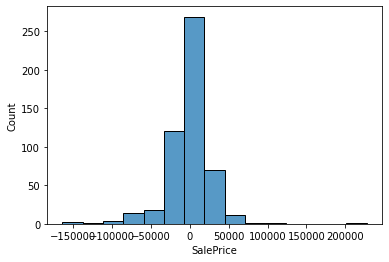

In [32]:
sns.histplot(residuals, bins=15);
#This looks like a normal distribution so this doesn't look too bad.

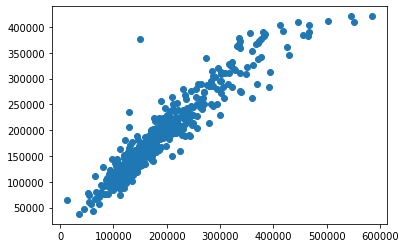

In [33]:
plt.scatter(y_test, preds);
#This doesn't look too bad!

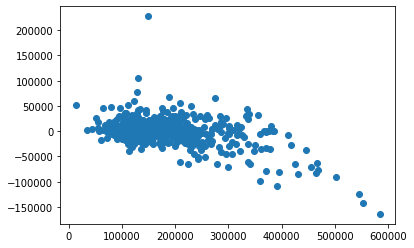

In [34]:
plt.scatter(y_test, residuals);
#That outlier at 200,000 is strange.